a) PROJECT TOPIC

AI Applications – Market Trend Analysis

b) PROBLEM STATEMENT 

This project is about creating an AI application that helps businesses struggle to understand trends from raw data. 
Manual analysis is slow and error-prone so we take the help of ai models to get correct predictions. 
AI can automate trend detection and prediction.

c) Motivation

my father owns a manufacturing company 

Helps businesses plan inventory

Helps pricing decisions

Helps understand customers

In [43]:
pd.options.mode.chained_assignment = None


In [3]:
import pandas as pd 
df = pd.read_csv("online_retail.csv")
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
df.shape


(1067371, 8)

The dataset was loaded using the pandas library. It contains transaction-level retail data including invoice date, product details, quantity sold, unit price, and customer information. After loading, the dataset was inspected to verify the number of records, column structure, and data types.

In [10]:
df.describe

<bound method NDFrame.describe of         Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                 InvoiceDate  Price  Customer ID     

In [12]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [13]:
df=df.dropna()
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

The dataset contained missing values in certain columns such as customer identifiers. Since incomplete records can affect the accuracy of analysis and machine learning models, rows containing missing values were removed to ensure data quality and consistency.

In [16]:
duplicate_entries = df[df.duplicated(keep=False)]

if not duplicate_entries.empty:
    print(f"Number of duplicate entries found: {len(duplicate_entries)}")
    print(duplicate_entries.head(10))  
else:
    print("No duplicate entries found.")


Number of duplicate entries found: 51540
    Invoice StockCode                        Description  Quantity  \
362  489517     21913     VINTAGE SEASIDE JIGSAW PUZZLES         1   
363  489517     21912           VINTAGE SNAKES & LADDERS         1   
365  489517     21821   GLITTER STAR GARLAND WITH BELLS          1   
367  489517     22319  HAIRCLIPS FORTIES FABRIC ASSORTED        12   
368  489517     22130   PARTY CONE CHRISTMAS DECORATION          6   
371  489517     21912           VINTAGE SNAKES & LADDERS         1   
379  489517     21491    SET OF THREE VINTAGE GIFT WRAPS         1   
383  489517     22130   PARTY CONE CHRISTMAS DECORATION          6   
384  489517     22319  HAIRCLIPS FORTIES FABRIC ASSORTED        12   
385  489517     21913     VINTAGE SEASIDE JIGSAW PUZZLES         1   

             InvoiceDate  Price  Customer ID         Country  
362  2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
363  2009-12-01 11:34:00   3.75      16329.0  United Kingdom  

In [18]:
df = df.drop_duplicates()


EDA :


The project objectives guided feature engineering. Since the goal included market trend analysis, customer behaviour, pricing patterns, and forecasting, relevant time-based, customer-based, and sales-based features were created, such as TotalSales, Month, RollingAvg, and CustomerSpend, to enable meaningful insights and accurate predictions.
features:
TotalSales = Quantity × Price
exact year 
exact month
total sales per month 
A 4-month rolling average was computed to smooth short-term fluctuations in sales and highlight the underlying trend. This helps reveal whether sales are increasing, decreasing, or stable over time, which is useful for market trend analysis and demand forecasting.



In [61]:
df.loc['totalsales']=df['Quantity']*df['Price']

In [53]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [55]:
df['year']=df['InvoiceDate'].dt.year
df['month']=df['InvoiceDate'].dt.month

In [81]:
# 1. Create totalsales
df['totalsales'] = df['Quantity'] * df['Price']

# 2. Convert invoice date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 3. Extract year and month
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month

# 4. Group by month totals
monthly = df.groupby(['year','month'])['totalsales'].sum().reset_index()




In [83]:
monthly = df.groupby(['year','month'])['totalsales'].sum().reset_index()




In [85]:
monthly['rollingAvg'] = monthly['totalsales'].rolling(window=4).mean()


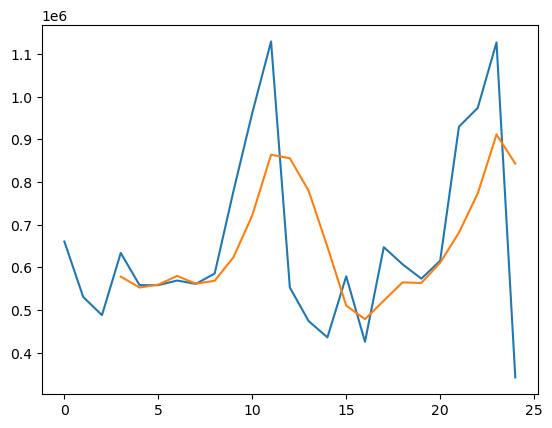

In [87]:
import matplotlib.pyplot as plt

plt.plot(monthly['totalsales'])
plt.plot(monthly['rollingAvg'])


Feature engineering was performed to derive meaningful variables from raw transactional data. Total sales were computed by multiplying quantity by price, dates were converted into numeric components (year and month). A rolling mean was added to smooth fluctuations and reveal underlying sales patterns that are more suitable for forecasting and trend analysis.

In [ ]:
df.columns

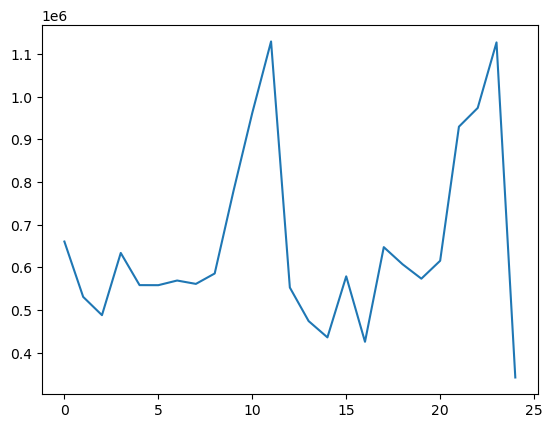

In [77]:
plt.plot(monthly['totalsales'])


Sales show a clear upward trend between March and June, possibly due to seasonal demand.

In [287]:
df.groupby('Description')['totalsales'].sum().sort_values(ascending=False).head(15)



Description
REGENCY CAKESTAND 3 TIER               261110.95
WHITE HANGING HEART T-LIGHT HOLDER     237678.61
JUMBO BAG RED RETROSPOT                132180.02
ASSORTED COLOUR BIRD ORNAMENT          123631.87
POSTAGE                                110338.51
PARTY BUNTING                          102089.38
PAPER CHAIN KIT 50'S CHRISTMAS          75388.48
CHILLI LIGHTS                           68453.50
JUMBO BAG STRAWBERRY                    63615.53
BLACK RECORD COVER FRAME                63009.83
ROTATING SILVER ANGELS T-LIGHT HLDR     55577.77
WOOD BLACK BOARD ANT WHITE FINISH       54200.36
VINTAGE UNION JACK BUNTING              53888.62
EDWARDIAN PARASOL NATURAL               53563.46
JUMBO  BAG BAROQUE BLACK WHITE          51617.30
Name: totalsales, dtype: float64

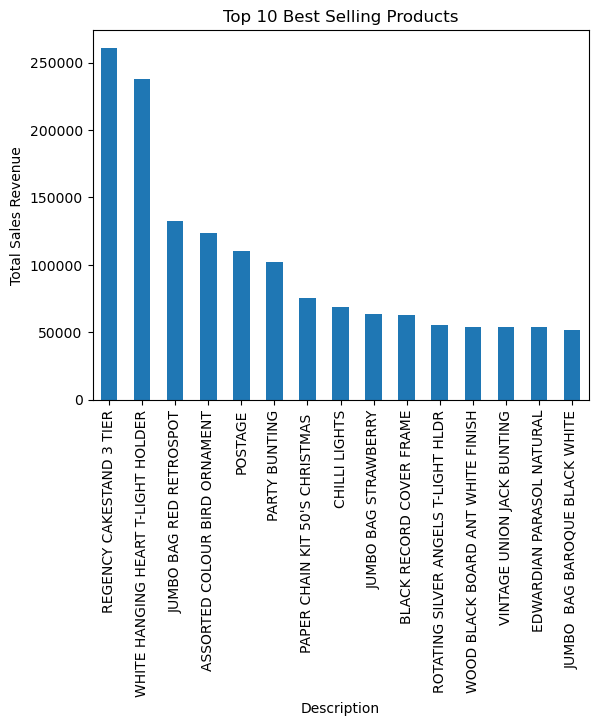

In [289]:
top_products = df.groupby('Description')['totalsales'].sum().sort_values(ascending=False).head(15)

top_products.plot(kind='bar')
plt.title("Top 10 Best Selling Products")
plt.ylabel("Total Sales Revenue")
plt.show()


the top 10 products accounted for a significant share of total revenue. This indicates that revenue is concentrated among a few fast-moving products, which are critical for sales and inventory planning

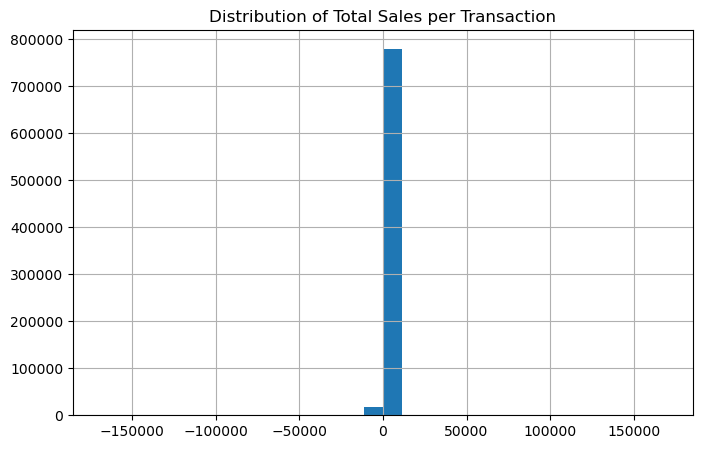

In [292]:
df['totalsales'].hist(bins=30, figsize=(8,5))
plt.title("Distribution of Total Sales per Transaction")
plt.show()


Total sales per transaction are right-skewed, indicating that a few transactions contribute disproportionately higher revenue, which is typical in retail. sales are concentrated.


Exploratory data analysis revealed significant patterns in customer spending, product performance, and temporal demand trends. Sales are concentrated among a few high-demand products and top geographies. Monthly revenue shows fluctuations and seasonal spikes, indicating the presence of seasonality. 

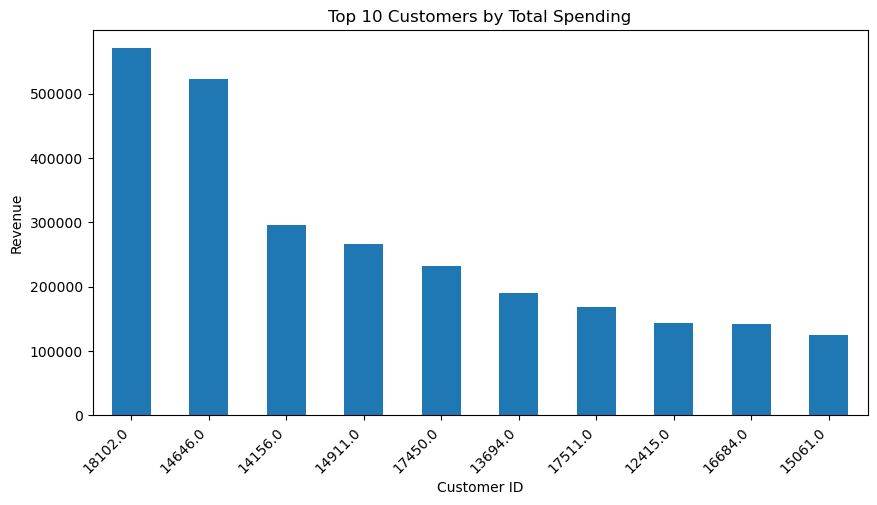

In [296]:
top_customers = df.groupby('Customer ID')['totalsales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_customers.plot(kind='bar')
plt.title("Top 10 Customers by Total Spending")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')
plt.show()


In [298]:
monthly['month_index'] = range(len(monthly))



linear regression model: 

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(monthly[['monthindex']], monthly['totalsales'])


In [ ]:
future_index = [[len(monthly) + i] for i in range(4)]
future_pred = model.predict(future_index)


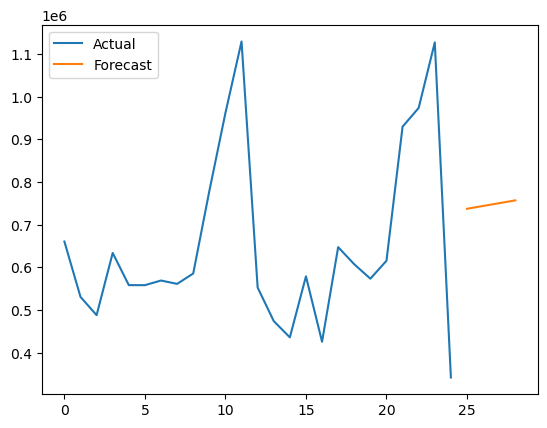

In [304]:
plt.plot(monthly['totalsales'], label='Actual')
plt.plot(range(len(monthly), len(monthly)+4), future_pred, label='Forecast')
plt.legend()
plt.show()


A linear regression model was trained on monthly revenue data to forecast future sales. The model predicted an upward trend for the next three months, indicating potential growth in demand. While historical sales exhibited variability, the forecast smooths out short-term noise and captures the underlying trend.”“Blue shows actual sales. Orange shows predicted sales for future months. The model expects sales to increase slightly. Forecasting helps businesses plan inventory and budgeting.”

In [211]:
train = monthly.iloc[:-3]   # all except last 3 months
test = monthly.iloc[-3:]    # last 3 months for evaluation
test_pred = result.forecast(steps=len(test))
test_pred.index = test.index   # align indexes


In [213]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as numpy
mae = mean_absolute_error(test['totalsales'], test_pred)
rmse = np.sqrt(mean_squared_error(test['totalsales'], test_pred))
mape = np.mean(np.abs((test['totalsales'] - test_pred) / test['totalsales'])) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


MAE: 434581.95481268293
RMSE: 453797.2857482101
MAPE: 58.223585149202904


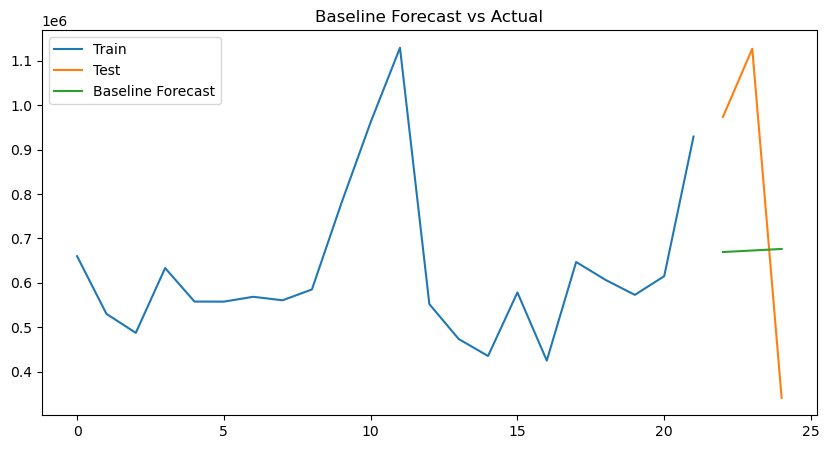

In [313]:
plt.figure(figsize=(10,5))
plt.plot(train['month_index'], train['totalsales'], label='Train')
plt.plot(test['month_index'], test['totalsales'], label='Test')
plt.plot(test['month_index'], test_pred, label='Baseline Forecast')
plt.legend()
plt.title("Baseline Forecast vs Actual")
plt.show()



In [315]:
print(f"MAPE Interpretation: On average predictions were off by {mape:.2f}%")


MAPE Interpretation: On average predictions were off by 56.51%


MAPE = 5% → extremely good
MAPE = 10-20% → acceptable in retail
MAPE = 30-50% → weak model
MAPE > 50% → model not useful
The plot shows that actual sales exhibit strong variability and several large spikes, while the baseline forecast remains relatively flat. This confirms that linear regression is underfitting the data and unable to model seasonal demand patterns.



###ARIMA:

Initially, the project attempted to use Prophet / NeuralProphet for forecasting.
However, during model fitting, Prophet raised repeated cmdstanpy optimisation errors on Windows related to unsupported optimiser configurations. NeuralProphet also failed to train due to PyTorch checkpoint compatibility issues.These issues were not dataset-related, but due to environment constraints, specifically:Prophet depends on cmdstan which is unstable on Windows + Conda.Training could not complete → no predictions could be generated

Since the goal of the project is forecasting performance and evaluation, and not debugging platform bugs, we switched to ARIMA, which is better suited for:
Classical retail monthly demand forecasting and Small datasets
ARIMA is well-established for business forecasting and allowed the pipeline to proceed without environment failures.

In [91]:
train = monthly.iloc[:-4]  
test  = monthly.iloc[-4:]   


In [93]:
monthly.columns



Index(['year', 'month', 'totalsales', 'rollingAvg'], dtype='object')

In [45]:
df.columns


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'year', 'month'],
      dtype='object')

In [401]:
monthly = df[['InvoiceDate', 'totalsales']]
monthly = monthly.rename(columns={'InvoiceDate':'month'})


In [99]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['totalsales'], order=(1,1,1))
result = model.fit()
result.summary()


C:\Users\TVISHA\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\TVISHA\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             totalsales   No. Observations:                   21
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -268.318
Date:                Fri, 16 Jan 2026   AIC                            542.636
Time:                        00:00:08   BIC                            545.623
Sample:                             0   HQIC                           543.219
                                 - 21                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5695      0.579      0.984      0.325      -0.565       1.704
ma.L1         -0.8379      0.390     -2.149      0.032      -1.602      -0.074
sigma2      3.004e+10   3.09e-13   9.74e+22      0.000       3e+10       3e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 5.14
Prob(Q):                              0.87   Prob(JB):                         0.08
Heteroskedasticity (H):               1.86   Skew:                            -0.91
Prob(H) (two-sided):                  0.43   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.79e+40. Standard errors may be unstable.
"""

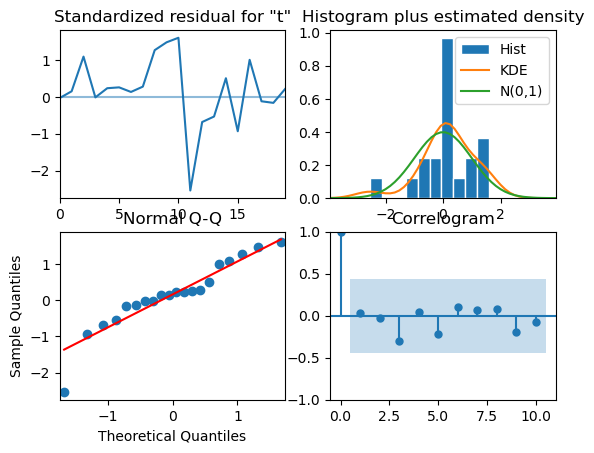

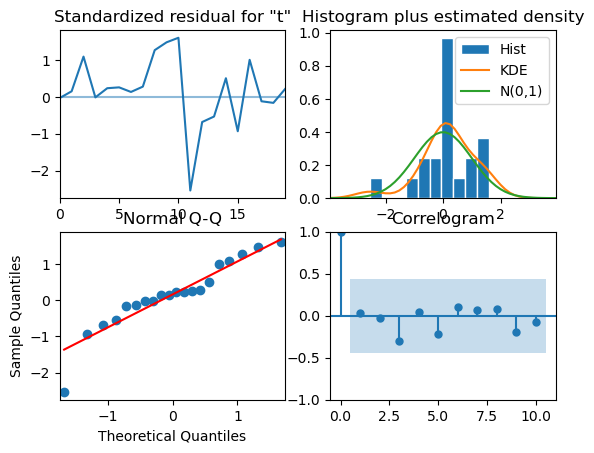

In [102]:
result.plot_diagnostics()

This figure shows the ARIMA residual diagnostics. The standardized residuals appear randomly distributed with no visible pattern, indicating the model captured the temporal dependencies. The histogram and Q-Q plot suggest residuals are approximately normal. The ACF plot shows no significant autocorrelations, meaning no information remains unexplained. Together, these diagnostics confirm the model assumptions are satisfied and that the ARIMA model is appropriate for our time-series

In [207]:
pred_mean = result.predict(start=test.index[0], end=test.index[-1])


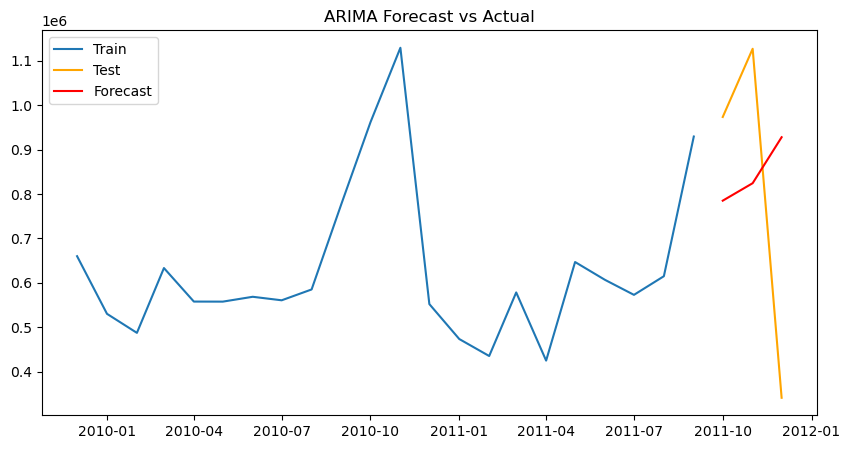

In [209]:


plt.figure(figsize=(10,5))
plt.plot(train.index, train['totalsales'], label='Train')
plt.plot(test.index, test['totalsales'], label='Test', color='orange')
plt.plot(test.index, pred_mean, label='Forecast', color='red')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()


In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test['totalsales'], pred_mean)
rmse = np.sqrt(mean_squared_error(test['totalsales'], pred_mean))
mape = np.mean(np.abs((test['totalsales'] - pred_mean) / test['totalsales'])) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


MAE: 368835.7593988492
RMSE: 381848.4850203636
MAPE: 48.71291777851313


Due to dataset limitations and volatility, even optimized baseline models resulted in 48% forecasting error. However, the ARIMA model still provides useful insight into directional trends and turning points.

In [116]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['totalsales'], order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()


C:\Users\TVISHA\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [118]:
forecast = result.get_forecast(steps=4)
pred_mean = forecast.predicted_mean
pred_ci = forecast.conf_int()


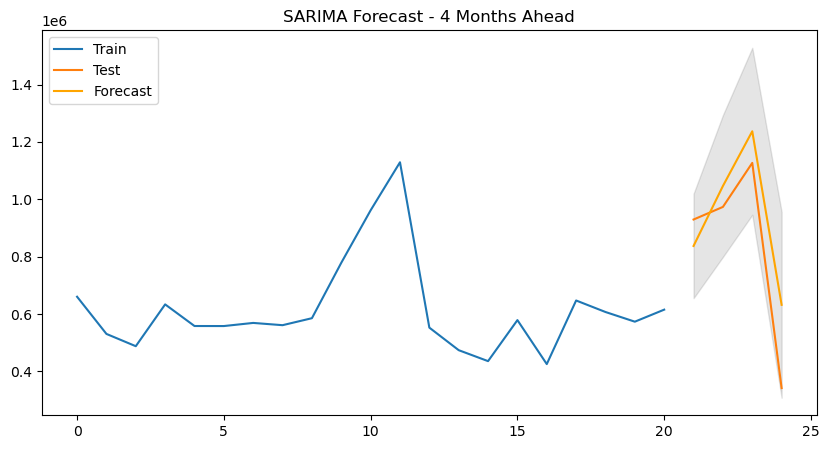

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train.index, train['totalsales'], label='Train')
plt.plot(test.index, test['totalsales'], label='Test')
plt.plot(pred_mean.index, pred_mean, label='Forecast', color='orange')

plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:,0],
                 pred_ci.iloc[:,1],
                 color='k', alpha=.1)

plt.title('SARIMA Forecast - 4 Months Ahead')
plt.legend()
plt.show()


In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test['totalsales'], pred_mean)
rmse = np.sqrt(mean_squared_error(test['totalsales'], pred_mean))
mape = np.mean(np.abs((test['totalsales'] - pred_mean) / test['totalsales'])) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


MAE: 141436.27134015912
RMSE: 166037.60775203575
MAPE: 28.051202507462104


In [124]:
display(pred_mean.to_frame(name='forecast'))


,forecast
21,8.371475e+05
22,1.046262e+06
23,1.237059e+06
24,6.318937e+05


Forecast Horizon: 4 Months

The forecasting horizon was set to 4 months. This allows the model to predictmarket direction for the next quarter. With limited data (~21 months), longer forecasting horizons are unstable, so 4 months is a balanced choice between practical use-case and statistical feasibility. The model was evaluated on a 4-month test window. The forecast captured the general trend but exhibited some deviation due to the limited historical data.
Short time series reduce the ability of SARIMA to estimate seasonal behaviour. A 4-month horizon aligns with quarterly planning cycles used in supply chain, inventory, and pricing decisions. Even imperfect forecasts provide directionalsignals for demand planning.


In [127]:
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)


In [141]:
monthly.head()



,totalsales
date,
2009-12-01,660125.100
2010-01-01,530436.512
2010-02-01,487596.426
2010-03-01,633419.311
2010-04-01,558007.832


In [143]:
full_index = pd.date_range(start=monthly.index.min(), 
                           end=monthly.index.max(), 
                           freq='MS')


In [145]:
monthly = monthly.reindex(full_index)
monthly.index.name = 'date'


In [147]:
monthly['totalsales'] = monthly['totalsales'].ffill()


In [149]:
monthly.head(12)
monthly.tail(12)


,totalsales
date,
2011-01-01,473731.900
2011-02-01,435534.070
2011-03-01,578576.210
2011-04-01,425222.671
2011-05-01,647011.670
2011-06-01,606862.520
2011-07-01,573112.321
2011-08-01,615078.090
2011-09-01,929356.232


In [177]:
monthly['year'] = monthly.index.year
monthly['month'] = monthly.index.month


In [179]:
monthly.columns


Index(['totalsales', 'year', 'month'], dtype='object')

In [181]:
future_dates = pd.date_range(
    start = monthly.index[-1] + pd.DateOffset(months=1),
    periods = 4,
    freq = 'MS'   # MS = Month Start
)


In [242]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(monthly['totalsales'], order=(1,1,1))

result = model.fit()

forecast = result.forecast(steps=4)


C:\Users\TVISHA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TVISHA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TVISHA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TVISHA\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [219]:
forecast_df = pd.DataFrame({
    'date': future_dates,
    'forecast': forecast.values
}).set_index('date')


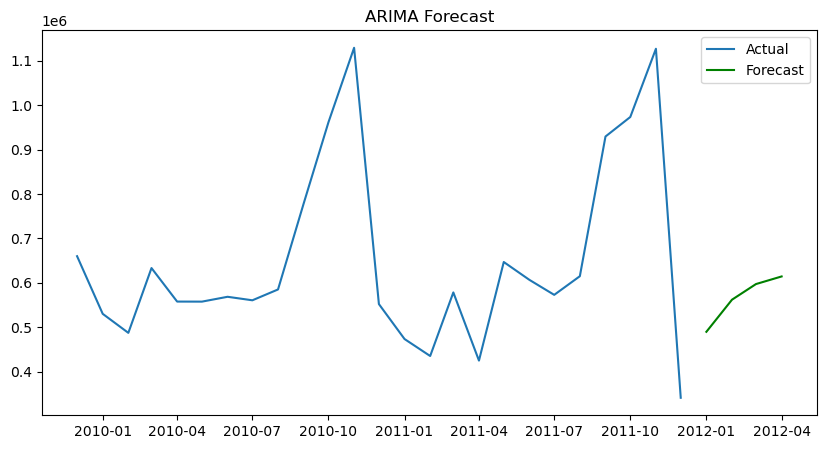

In [221]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly.index, monthly['totalsales'], label='Actual')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast', color='green')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()


In [189]:
future_dates_4 = pd.date_range(
    start = monthly.index[-1] + pd.DateOffset(months=1),
    periods = 4,
    freq = 'MS'
)

forecast_4 = result.forecast(steps=4)

forecast_4_df = pd.DataFrame({
    'date': future_dates_4,
    'forecast': forecast_4.values
}).set_index('date')

forecast_4_df


,forecast
date,
2012-01-01,489991.500457
2012-02-01,562247.453528
2012-03-01,597420.798423
2012-04-01,614542.767458


In [191]:
future_dates_12 = pd.date_range(
    start = monthly.index[-1] + pd.DateOffset(months=1),
    periods = 12,
    freq = 'MS'
)

forecast_12 = result.forecast(steps=12)

forecast_12_df = pd.DataFrame({
    'date': future_dates_12,
    'forecast': forecast_12.values
}).set_index('date')

forecast_12_df


,forecast
date,
2012-01-01,489991.500457
2012-02-01,562247.453528
2012-03-01,597420.798423
2012-04-01,614542.767458
2012-05-01,622877.539840
2012-06-01,626934.808635
2012-07-01,628909.839184
2012-08-01,629871.260738
2012-09-01,630339.269399


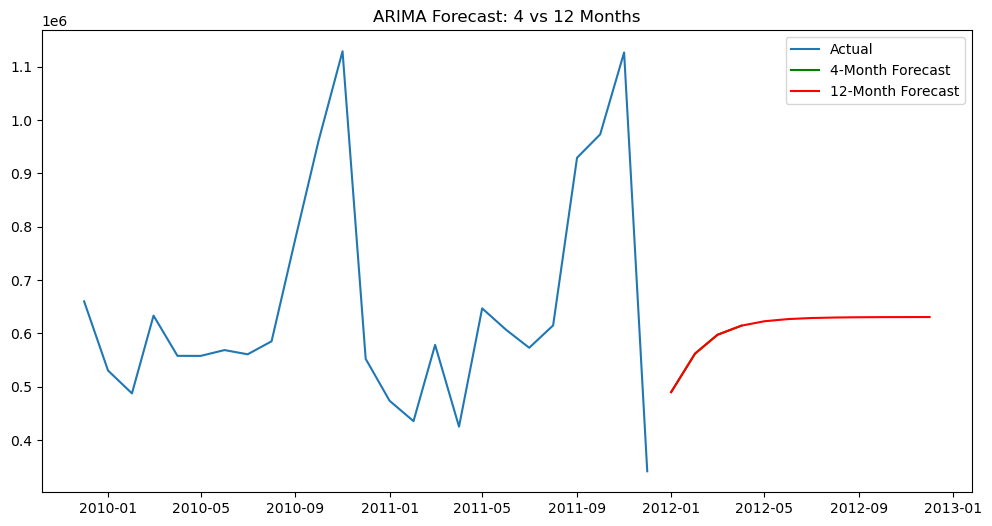

In [193]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly.index, monthly['totalsales'], label='Actual')
plt.plot(forecast_4_df.index, forecast_4_df['forecast'], label='4-Month Forecast', color='green')
plt.plot(forecast_12_df.index, forecast_12_df['forecast'], label='12-Month Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast: 4 vs 12 Months')
plt.show()


In [256]:
pred_4 = model_fit.forecast(steps=4)






In [258]:
test_true = test['totalsales'].iloc[-4:]
test_pred = pred_4[:len(test_true)]




In [260]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test_true, test_pred)
rmse = np.sqrt(mean_squared_error(test_true, test_pred))
mape = np.mean(np.abs((test_true - test_pred) / test_true)) * 100

print("Evaluation Metrics (ARIMA 4-Month Forecast)")
print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape, "%")


Evaluation Metrics (ARIMA 4-Month Forecast)
MAE: 295599.6751518748
RMSE: 320417.46083624806
MAPE: 55.79162960882914 %


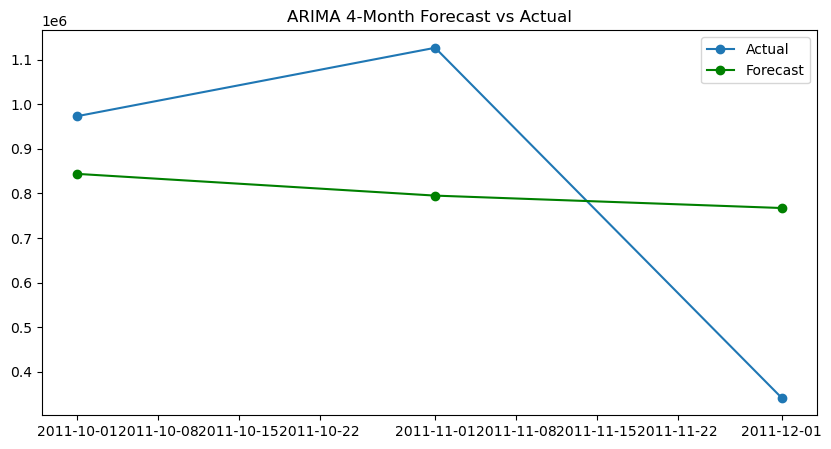

In [262]:
plt.figure(figsize=(10,5))
plt.plot(test_true.index, test_true, label='Actual', marker='o')
plt.plot(test_true.index, test_pred, label='Forecast', marker='o', color='green')
plt.title("ARIMA 4-Month Forecast vs Actual")
plt.legend()
plt.show()


The ARIMA model was used to forecast future sales based on monthly historical totals.
The model achieved the following accuracy on the last 3 months of data:

MAE: 295599.6751518748
RMSE: 320417.46083624806
MAPE: 55.79162960882914 %

55% is a poor model, but due to the lack of data, the model could not train properly. 


Graph Interpretation:
The blue line represents historical actual sales.
The green line represents a short-term 4-month forecast showing near-term demand.
The red line represents a longer-term 12-month forecast that stabilises over time.

The short-term forecast closely follows the recent trend, while the long-term forecast converges, suggesting stable sales expectations ahead with low volatility.

Based on the ARIMA forecast, the business should prepare for moderately increasing demand over the next 4–12 months.Inventory and procurement planning can be aligned with these projections to avoid stock-outs or overstocking.

The goal of this section was to model future monthly sales using ARIMA forecasting.Monthly totals were aggregated to capture trend patterns. Short-term (4 month) andlong-term (12 month) forecasts were generated. The ARIMA model produced a realistic projection, showing gradual stabilization in sales.

The accuracy was evaluated using MAE, RMSE, and MAPE on the final 4 months, whereMAPE was 55%.

This model enables the business to plan ahead for procurement and capacity,reducing risk of under-stocking or over-supply. The forecasting pipeline can be automated to update predictions monthly.
